In [2]:
# IMPORTING LIBRABRIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True
        
# IGNORE UNNECESSARY WARNINGS        
import warnings 
warnings.filterwarnings("ignore")

# IMPORTING DATA FILES INSIDES AI/INPUT DIRECTORY
import os
print(os.listdir("../AI/input/"))

SyntaxError: invalid syntax (2005071713.py, line 9)

In [11]:
# READING AND DISPLAYING DATA FOR UNDERSTANDING.
iris = pd.read_csv("../AI/input/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# DISPLAYING DESCRIPTION OF THE DATAFRAME FOR BETTER UNDERSTANDING
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<AxesSubplot: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

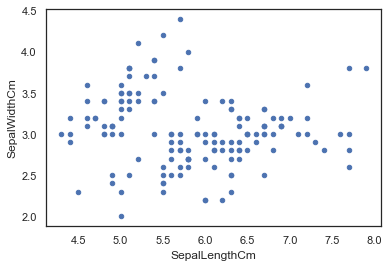

In [16]:
# CREATING SCATTERPLOT OF IRIS FEATURES.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

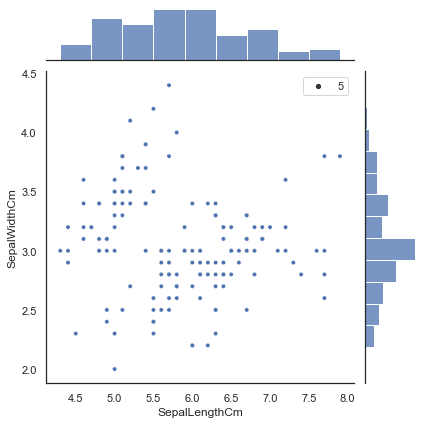

In [18]:
# SEABORN JOINTPLOT TO DISPLAY BIVARIATE SCATTERPLOTS AND UNIVARIATE HISTOGRAMS AT ONCE
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

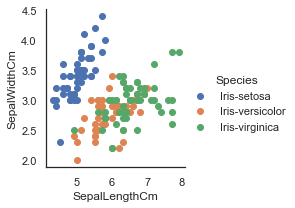

In [21]:
# SEABORN FACETGRID TO COLOR THE SPECIES COLORWISE
sns.FacetGrid(iris, hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

<AxesSubplot: xlabel='Species', ylabel='PetalLengthCm'>

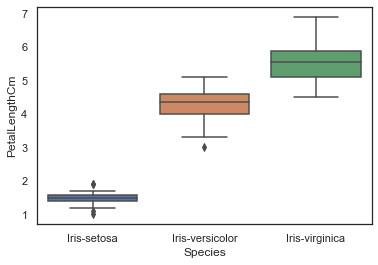

In [24]:
# BOXPLOT FOR INDIVIDUAL FEATURE
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

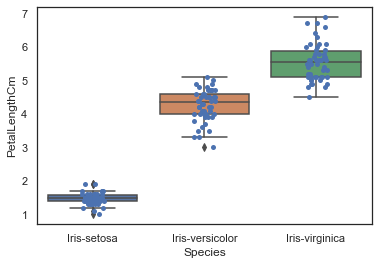

In [26]:
# ADDING A LAYER OF INDIVIDUAL POINTS WITH STRIPLOT.
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

<AxesSubplot: xlabel='Species', ylabel='PetalLengthCm'>

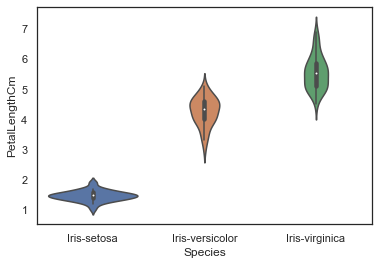

In [28]:
# DISPLAYING VIOLIN PLOT
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

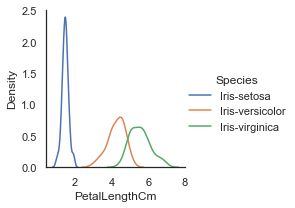

In [32]:
# KDE PLOT WHICH CREATES AND VISUALIZE A KERNEL DENSITY ESTIMATE OF FEATURES.
sns.FacetGrid(iris, hue="Species") \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

In [1]:
# FROM THE PAIRPLOT, WE'LL SEE THAT THE IRIS-SETOSA SPECIES IS SEPARATAED FROM THE OTHER
# TWO ACROSS ALL FEATURE COMBINATIONS
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

NameError: name 'sns' is not defined

array([[<AxesSubplot: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

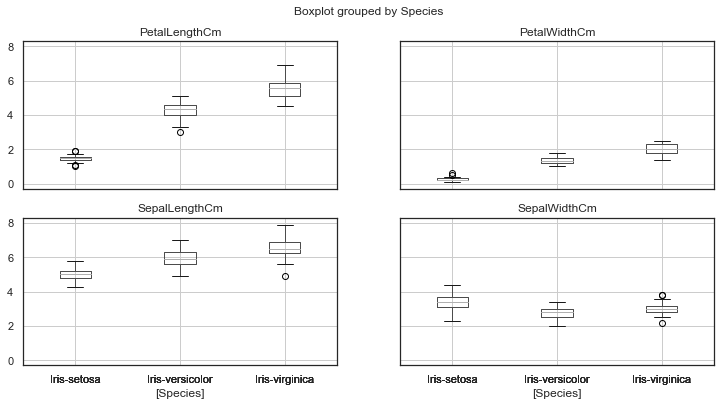

In [37]:
# BOX PLOT GRID
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

<AxesSubplot: >

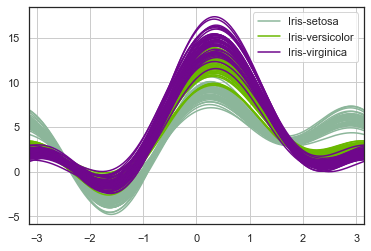

In [39]:
# ANDREWS CURVES USING ATTRIBUTES OF SAMPLE AS COEFFICIENT AND PLOTTING.
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

<AxesSubplot: >

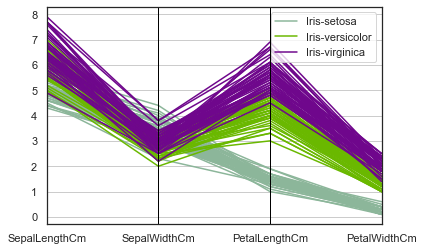

In [41]:
# PARALLEL_COORDINATES MULTIVARIATE VISUALIZATION
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

<AxesSubplot: >

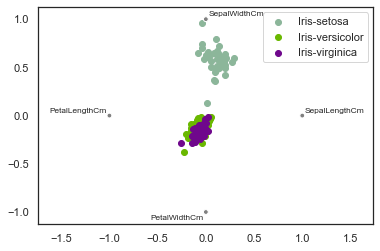

In [43]:
# MULTIVARIATE VISUALIZATION PUTTING EACH FEATURE ON A 2D PLANE BY RELATIVE FEATURE VALUE.
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

In [48]:
# IMPORTING SKLEARN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [50]:
# SEPARATING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# SPLITTING DATA INTO DEPENDENT AND INDEPENDENT VARIABLES
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# SUMMARY OF THE PREDICTIONS MADE BY THE CLASSIFIER
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ACCURACY SCORE
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [54]:
# K-NEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# SUMMARY OF THE PREDICTIONS MADE BY THE CLASSIFIER
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ACCURACY SCORE
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [56]:
# SUPPORT VECTOR MACHINES
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# SUMMARY OF THE PREDICTIONS MADE BY THE CLASSIFIER
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ACCURACY SCORE
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [58]:
# DESISION TREE
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# SUMMARY OF THE PREDICTIONS MADE BY THE CLASSIFIER
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ACCURACY SCORE
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is 0.9666666666666667


In [61]:
# GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# SUMMARY OF THE PREDICTIONS MADE BY THE CLASSIFIER
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ACCURACY SCORE
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [63]:
# MULTINOMIAL NAIVE BOYS
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# SUMMARY OF THE PREDICTIONS MADE BY THE CLASSIFIER
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.83      0.77      0.80        13
 Iris-virginica       0.62      0.83      0.71         6

       accuracy                           0.83        30
      macro avg       0.82      0.84      0.82        30
   weighted avg       0.85      0.83      0.84        30

[[10  1  0]
 [ 0 10  3]
 [ 0  1  5]]
accuracy is 0.8333333333333334


In [65]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        11
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.20      1.00      0.33         6

       accuracy                           0.20        30
      macro avg       0.07      0.33      0.11        30
   weighted avg       0.04      0.20      0.07        30

[[ 0  0 11]
 [ 0  0 13]
 [ 0  0  6]]
accuracy is 0.2


In [67]:
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       0.69      1.00      0.81        11
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.43      1.00      0.60         6

       accuracy                           0.57        30
      macro avg       0.37      0.67      0.47        30
   weighted avg       0.34      0.57      0.42        30

[[11  0  0]
 [ 5  0  8]
 [ 0  0  6]]
accuracy is 0.5666666666666667


In [69]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

GaussianNB
****Results****
Accuracy: 100.0000%
MultinomialNB
****Results****
Accuracy: 83.3333%
BernoulliNB
****Results****
Accuracy: 20.0000%
ComplementNB
****Results****
Accuracy: 56.6667%


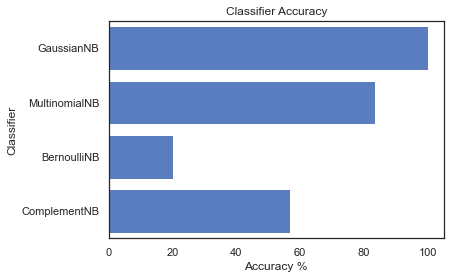

In [70]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()